In [2]:
import dateutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')
metadata = pd.read_csv(r'..\data\metadata\20210923_huishi_metadata_scatterplot_request.csv', index_col=0)
metadata.index = metadata.index.str.split('M ').str[0].str.split('T').str[1]

groups = file_grouping[file_grouping['fr_name'].isin(fr_quant_filenames_in_analytical_order)] \
            [['fr_name', 'rat_label', 'bg_type', 'week', 'glucose_tolerance']]
groups['week'] = groups['week'].astype('int')
groups['rat_label'] = groups['rat_label'].astype('int')
groups = groups.set_index('fr_name')
groups = groups.T

df = fr_filt[fr_quant_filenames_in_analytical_order] # + ['Lipid Class']]
df = df.append(groups).T
df['week'] = df['week'].astype('int')
df['rat_label'] = df['rat_label'].astype('int')
df = df.set_index([df.index, 'rat_label', 'bg_type', 'week', 'glucose_tolerance']).T
feature_class = fr_filt['Lipid Class']
feature_class_mi = pd.MultiIndex.from_frame(feature_class.reset_index())
df = df.set_index(feature_class_mi)

# https://stackoverflow.com/a/33298422

def filter_by(df, constraints, axis):
    """Filter MultiIndex by sublevels."""
    if axis == 0:
        indexer = [constraints[name] if name in constraints else slice(None)
                   for name in df.index.names]
        return df.loc[tuple(indexer)] if len(df.shape) == 1 else df.loc[tuple(indexer),]
    if axis == 1:
        indexer = [constraints[name] if name in constraints else slice(None)
                   for name in df.columns.names]
        return df.loc[:, tuple(indexer)] if len(df.shape) == 1 else df.loc[:, tuple(indexer),]        

pd.Series.filter_by = filter_by
pd.DataFrame.filter_by = filter_by

In [138]:
df

,,20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),...,20210729_AJ_Toh_RatBloodGlucose_T1092M_20210410_10wk_FBG.raw (F45),20210729_AJ_Toh_RatBloodGlucose_T1082M_20210325_8wk_RBG.raw (F30),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1093M_20210330_8wk_RBG.raw (F48),20210729_AJ_Toh_RatBloodGlucose_T1074M_20210329_9wk_FBG.raw (F19),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210330_8wk_RBG.raw (F54),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210330_8wk_RBG.raw (F42),20210729_AJ_Toh_RatBloodGlucose_T1092M_20210413_10wk_RBG.raw (F46)
,rat_label,1076,1062,1093,1060,1091,1092,1093,1082,1060,1101,...,1092,1082,1062,1102,1093,1074,1062,1101,1092,1092
,bg_type,FBG,FBG,FBG,RBG,FBG,RBG,RBG,FBG,RBG,FBG,...,FBG,RBG,RBG,FBG,RBG,FBG,RBG,RBG,RBG,RBG
,week,10,8,9,8,10,9,10,10,9,9,...,10,8,8,10,8,9,9,8,8,10
,glucose_tolerance,diabetic,impaired,normal,impaired,normal,impaired,normal,diabetic,impaired,diabetic,...,impaired,diabetic,impaired,impaired,normal,impaired,impaired,diabetic,impaired,impaired
Unique Identifier,Lipid Class,,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,unknown,1388749.128,10421872.865824,9761684.323293,16921439.53804,20688928.960266,15669494.721326,15473550.71764,10976959.20458,22473043.158375,11568964.50206,...,5778440.641962,10772995.12238,5531159.089789,9394719.924106,6994744.524707,4547156.482537,10709969.416478,12091064.707953,15211855.644512,12870363.786186
unknown_641.1087_0.537,unknown,3035805.818,25187896.703531,21759637.21643,53970365.787381,44964853.999588,32118819.369369,28807488.042992,27184415.156991,34856906.590804,32071862.575306,...,26580209.040746,13631037.452342,10933989.914237,21917324.579216,14501208.871636,4983605.791358,5986365.514152,24701156.987165,29588330.663132,25008307.122512
unknown_951.15973_0.541,unknown,1663566.711,13925677.102927,8616873.409517,31668716.622149,17280787.412394,18783610.036426,12963744.533145,17805969.390801,9434457.214292,16903858.872521,...,11480054.641035,6140714.458471,9971309.668317,13448834.403309,16656585.835021,12091643.69317,16807127.99205,15504703.058349,17600796.304189,11505247.236564
unknown_329.03067_0.542,unknown,22151942.96,117791789.303919,109682830.894935,66052943.57828,166812715.923247,169541225.239944,179026330.616622,157462193.916065,203255410.258634,146533218.048722,...,155319951.375407,76818576.539242,126198478.483618,117330026.998548,74209307.985385,104462043.706204,156045511.878862,131494549.000338,151554920.09114,93775353.834969
unknown_969.13147_0.544,unknown,681656.4071,6859485.144289,3460302.937599,16613341.086377,5240092.024078,9535689.552105,7278404.227445,7712597.657775,5525662.840195,6829185.243302,...,6367111.796283,3928397.339482,4907543.901523,5873009.985889,4845314.280741,4940117.900333,9316513.022112,7424280.702594,3528424.001508,4333286.595399


In [82]:
pd.DataFrame(metadata['OGTT (AUC)']).sort_values(by='OGTT (AUC)').T

,1091,1093,1074,1092,1062,1102,1060,1101,1082,1076
OGTT (AUC),846.75,993.0,1350.25,1377.95,1648.75,1738.25,1761.75,2015.75,2224.75,2321.25


In [139]:
# Assemble the DataFrame for correlations:
# Since groupby return error "no numeric types to aggregate", use column concatenation instead

correlations = pd.DataFrame()

for col in metadata:
    for bg_type in ['RBG', 'FBG']:
        for corr_type in ['pearson', 'kendall']:
            animal_feature = (metadata[col]).sort_values().T
            animal_feature.index = animal_feature.index.astype(int)

            result = pd.DataFrame()

            for animal in animals_used:
                adf = df.filter_by({'rat_label': animal,
                                    'bg_type': bg_type}, axis=1)
                result[animal] = adf.mean(axis=1)
                
            corr = result.corrwith(animal_feature, axis=1, method=corr_type)
            
            correlations[f'{col}_{bg_type}_{corr_type}'] = corr
            
# rbg_result = rbg_result.T
# [1091,1093,1074,1092,1062,1102,1060,1101,1082,1076]
# rbg_result = rbg_result.reindex(ogtt.columns, axis=1)
correlations

,,OGTT (AUC)_RBG_pearson,OGTT (AUC)_RBG_kendall,OGTT (AUC)_FBG_pearson,OGTT (AUC)_FBG_kendall,Insulin/Glucose (Fasting)_RBG_pearson,Insulin/Glucose (Fasting)_RBG_kendall,Insulin/Glucose (Fasting)_FBG_pearson,Insulin/Glucose (Fasting)_FBG_kendall,BF (%BW)_RBG_pearson,BF (%BW)_RBG_kendall,BF (%BW)_FBG_pearson,BF (%BW)_FBG_kendall,WF (%BW)_RBG_pearson,WF (%BW)_RBG_kendall,WF (%BW)_FBG_pearson,WF (%BW)_FBG_kendall,BF/WF_RBG_pearson,BF/WF_RBG_kendall,BF/WF_FBG_pearson,BF/WF_FBG_kendall
Unique Identifier,Lipid Class,,,,,,,,,,,,,,,,,,,,
unknown_679.05463_0.536,unknown,-0.452600,-0.244444,-0.307007,0.111111,-0.320280,-0.288889,-0.462081,-0.200000,0.162261,0.244444,-0.133089,-0.111111,-0.310046,0.022222,-0.238477,-0.066667,0.283811,0.288889,-0.057415,-0.155556
unknown_641.1087_0.537,unknown,-0.407892,-0.288889,-0.106046,-0.066667,-0.270988,-0.244444,-0.125706,-0.111111,0.150656,0.111111,-0.077773,-0.022222,-0.275600,-0.111111,0.058169,0.111111,0.248603,0.244444,-0.097557,-0.066667
unknown_951.15973_0.541,unknown,0.320995,0.111111,0.424519,0.155556,-0.230445,-0.022222,-0.455565,-0.333333,0.119687,0.066667,-0.263891,-0.066667,-0.045009,0.111111,-0.146316,-0.111111,0.142819,0.288889,-0.253777,-0.111111
unknown_329.03067_0.542,unknown,-0.107082,-0.066667,-0.373631,-0.288889,-0.416647,-0.466667,-0.022130,0.022222,0.099892,-0.022222,0.330105,0.111111,-0.528694,-0.422222,-0.214971,-0.022222,0.227147,0.200000,0.420045,0.244444
unknown_969.13147_0.544,unknown,0.315504,0.244444,-0.048208,0.111111,-0.146243,0.022222,0.283613,0.244444,0.416719,0.200000,0.160062,0.066667,0.123253,0.244444,0.358029,0.200000,0.422034,0.333333,0.069003,-0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
unknown_897.82532_20.148,unknown,0.704273,0.466667,-0.438403,-0.155556,-0.384255,-0.022222,-0.182106,0.066667,-0.361472,-0.111111,-0.064024,0.066667,-0.128778,0.022222,-0.166534,0.111111,-0.378803,-0.155556,-0.021459,0.200000
unknown_974.9118_20.163,unknown,0.698519,0.600000,-0.365765,-0.155556,-0.333621,0.022222,-0.005320,0.066667,-0.335697,-0.155556,0.226095,0.244444,-0.055751,0.244444,0.059408,0.200000,-0.360276,-0.200000,0.246725,0.466667
unknown_593.58716_20.175,unknown,0.708395,0.466667,-0.378835,-0.111111,-0.375180,-0.111111,-0.156242,0.022222,-0.347255,-0.200000,-0.125870,-0.155556,-0.115856,0.022222,-0.138004,0.066667,-0.363224,-0.244444,-0.097938,0.066667


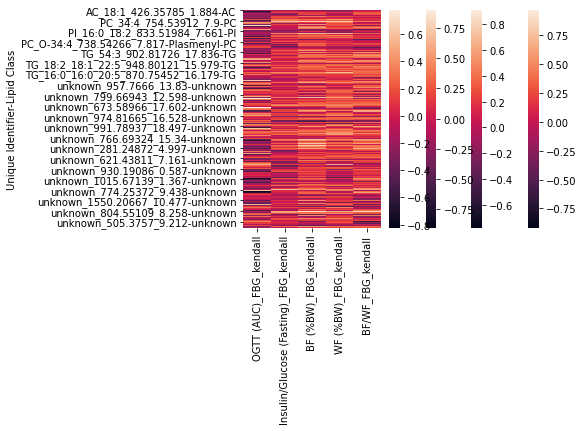

In [152]:
for bg_type in ['RBG', 'FBG']:
    for corr_type in ['pearson', 'kendall']:
        
        corr = correlations.filter(regex=f'(?=.*{bg_type})(?=.*{corr_type})')
        corr = corr.sort_values('Lipid Class')
        sns.heatmap(corr)

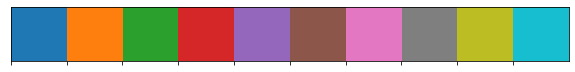

IndexError: list index out of range

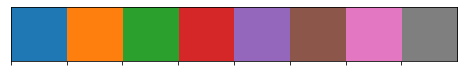

In [258]:
# prep row colors
palette = sns.color_palette(n_colors=8)
sns.palplot(palette)

color_class_map = {}

for i, lipid_class in enumerate(idx.unique()):
#     print('"' + lipid_class + '"')
    color_class_map[lipid_class] = palette[i]

"unknown"
"LysoPC"
"LysoPE"
"AC"
"PC"
"Alkenyl-DG"
"PI"
"SM"
"Plasmenyl-PC"
"Plasmanyl-PC"
"Plasmenyl-PE"
"PE"
"Plasmanyl-PE"
"Cer[NS]"
"TG"
"CE"


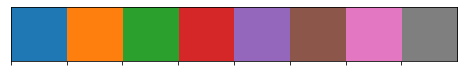

In [262]:
p = sns.color_palette(n_colors=8)
sns.palplot(p)

for lipid_class in fr_filt['Lipid Class'].unique():
    print('"' + lipid_class + '"')
    
color_class_map_manual = {
    "unknown": p[7],
    "LysoPC": p[1],
    "LysoPE": p[2],
    "AC": p[6],
    "PC": p[1],
    "Alkenyl-DG": p[3],
    "PI": p[6],
    "SM": p[6],
    "Plasmenyl-PC": p[0],
    "Plasmanyl-PC": p[0], 
    "Plasmenyl-PE": p[0],
    "PE": p[2],
    "Plasmanyl-PE": p[0],
    "Cer[NS]": p[4],
    "TG": p[3],
    "CE": p[3],
}

Text(0.5, 0.98, 'Pearson correlation animal-lipid class')

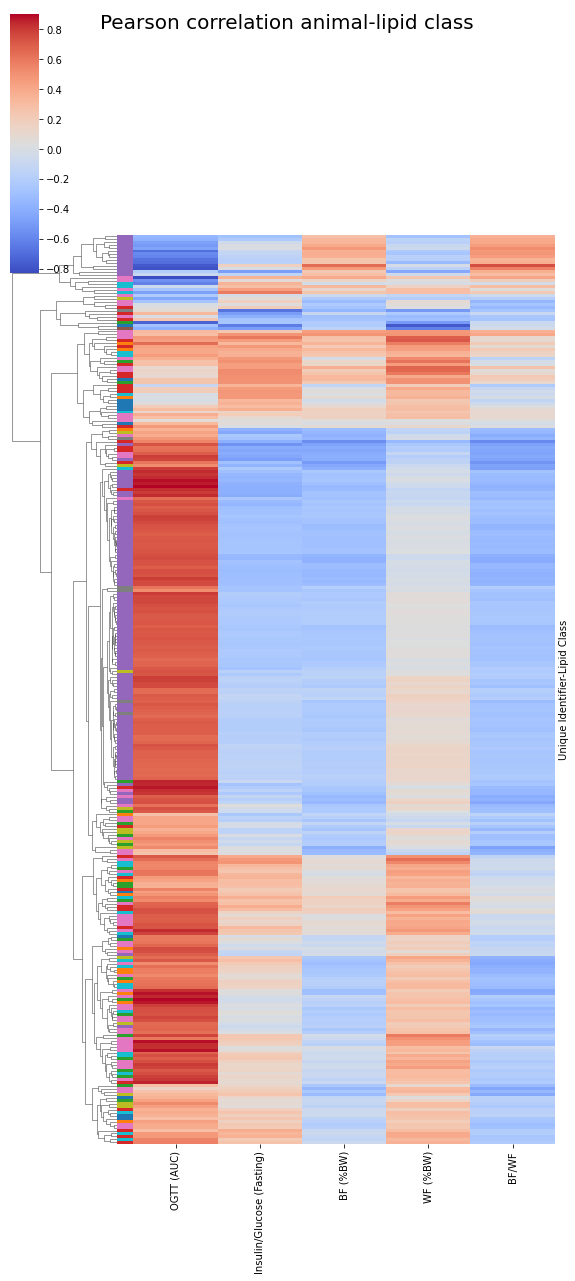

In [271]:


# fig, axs = plt.subplots(nrows=1, ncols=1, sharey=True, constrained_layout=True)
# fig.set_size_inches((6, 20))


corr = correlations.filter(regex=f'(?=.*RBG)(?=.*pearson)')
corr = corr.sort_values('Lipid Class')
corr = corr[~corr.index.isin(['unknown'], level=1)]   # REMOVE LINE TO INCLUDE UNKNOWNS. THIS FILTERS OUT UNKNOWNS
# display(corr)

idx = corr.index.get_level_values(1)

# prep row colors
palette = sns.color_palette(n_colors=16)
# sns.palplot(palette)

color_class_map = {}

for i, lipid_class in enumerate(idx.unique()):
#     print('"' + lipid_class + '"')
    color_class_map[lipid_class] = palette[i]
    
feature_color_map = {}
for id_class_tup in corr.index:
    feature_color_map[id_class_tup[0]] = color_class_map[id_class_tup[1]]

xticklabels = [col.split('_')[0] for col in corr.columns]
    
sns.clustermap(corr, 
               yticklabels='',
               xticklabels=xticklabels,
               row_colors=[pd.Series(feature_color_map)], 
               col_cluster=False,
               cmap='coolwarm',
               )

fig = plt.gcf()
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.set_size_inches((8, 20))
plt.xticks(rotation=45)
# plt.legend()
fig.suptitle('Pearson correlation animal-lipid class', fontsize=20)

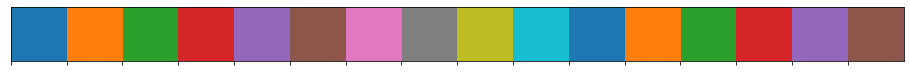

In [211]:

#     "AC":
#     "Alkenyl-DG":
#     "CE":
#     "Cer[NS]":
#     "LysoPC":
#     "LysoPE":
#     "PC":
#     "PE":
#     "PI":
#     "Plasmanyl-PC": 
#     "Plasmanyl-PE":
#     "Plasmenyl-PC":
#     "Plasmenyl-PE":
#     "SM":
#     "TG": 
#     "unknown": 'gray'
# }






In [212]:
color_class_map

{'AC': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Alkenyl-DG': (1.0, 0.4980392156862745, 0.054901960784313725),
 'CE': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 'Cer[NS]': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 'LysoPC': (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 'LysoPE': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 'PC': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 'PE': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 'PI': (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 'Plasmanyl-PC': (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 'Plasmanyl-PE': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 'Plasmenyl-PC': (1.0, 0.4980392156862745, 0.054901960784313725),
 'Plasmenyl-PE': (0.17254901960784313,
  0.6274509803921569,
  0.17254901960784313),
 'SM': (0.8392156862745098, 0.15294117647058825, 0.156

In [167]:
corr.columns

MultiIndex([(               'AC_18:1_426.35785_1.884',         'AC'),
            ('Alkenyl-DG_P-16:0_20:5_599.50403_7.558', 'Alkenyl-DG'),
            (     'Alkenyl-DG_P-38:6_625.51947_7.766', 'Alkenyl-DG'),
            (              'CE_18:2_666.61865_17.158',         'CE'),
            (               'CE_20:4_690.61902_16.61',         'CE'),
            (              'CE_20:5_688.60315_15.816',         'CE'),
            (               'CE_18:1_668.63452_18.03',         'CE'),
            (   'Cer[NS]_d18:1_22:0_620.59955_12.741',    'Cer[NS]'),
            (   'Cer[NS]_d18:1_24:1_646.61505_12.627',    'Cer[NS]'),
            (        'Cer[NS]_d41:1_634.61493_13.265',    'Cer[NS]'),
            ...
            (              'unknown_1656.14514_8.831',    'unknown'),
            (                'unknown_898.5813_8.834',    'unknown'),
            (              'unknown_1542.14661_8.868',    'unknown'),
            (               'unknown_831.57019_8.885',    'unknown'),
    

In [159]:
sns.heatmap?

<AxesSubplot:>

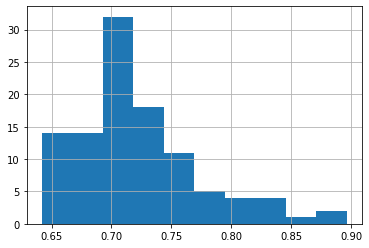

In [133]:
corr = rbg_result.corrwith(ogtt, axis=1)
corr.filter_by({'Lipid Class': 'TG'}, axis=0).hist()

Lipid Class
AC              AxesSubplot(0.125,0.125;0.775x0.755)
Alkenyl-DG      AxesSubplot(0.125,0.125;0.775x0.755)
CE              AxesSubplot(0.125,0.125;0.775x0.755)
Cer[NS]         AxesSubplot(0.125,0.125;0.775x0.755)
LysoPC          AxesSubplot(0.125,0.125;0.775x0.755)
LysoPE          AxesSubplot(0.125,0.125;0.775x0.755)
PC              AxesSubplot(0.125,0.125;0.775x0.755)
PE              AxesSubplot(0.125,0.125;0.775x0.755)
PI              AxesSubplot(0.125,0.125;0.775x0.755)
Plasmanyl-PC    AxesSubplot(0.125,0.125;0.775x0.755)
Plasmanyl-PE    AxesSubplot(0.125,0.125;0.775x0.755)
Plasmenyl-PC    AxesSubplot(0.125,0.125;0.775x0.755)
Plasmenyl-PE    AxesSubplot(0.125,0.125;0.775x0.755)
SM              AxesSubplot(0.125,0.125;0.775x0.755)
TG              AxesSubplot(0.125,0.125;0.775x0.755)
unknown         AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

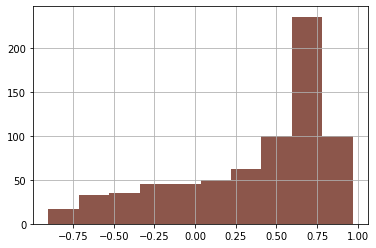

In [125]:
print(rbg_result.columns)
print(ogtt.columns)
rbg_result.columns == ogtt.columns

Int64Index([1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101], dtype='int64')
Int64Index([1091, 1093, 1074, 1092, 1062, 1102, 1060, 1101, 1082, 1076], dtype='int64')


array([ True,  True, False, False, False, False, False, False,  True,
       False])

In [102]:
rbg_result.columns

Index(['1091', '1093', '1074', '1092', '1062', '1102', '1060', '1101', '1082',
       '1076'],
      dtype='object')

In [103]:
ogtt.columns

Index(['1091', '1093', '1074', '1092', '1062', '1102', '1060', '1101', '1082',
       '1076'],
      dtype='object')

In [66]:
rbg_result.corrwith(ogtt, method='pearson', axis=1)

ValueError: cannot join with no overlapping index names

In [38]:
df.corrwith?